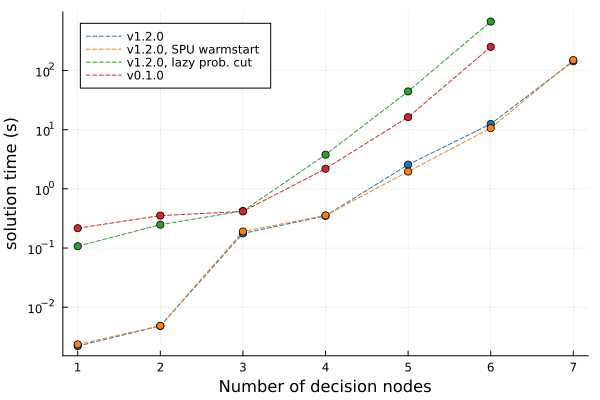

In [8]:
using DelimitedFiles, Plots, LaTeXStrings, Plots.PlotMeasures, Statistics 
N_sample = 50
N_max = 7
t1 = zeros(N_max, N_sample)
t2 = zeros(N_max, N_sample)
t_spu = zeros(N_max, N_sample)
obj = zeros(N_max, N_sample)
obj_spu = zeros(N_max, N_sample)
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/results/nmon_"*string(i)*".csv", ',')
        for j in 1:N_max
            t1[j,i] = result[j,1]
            t2[j,i] = result[j,2]
            t_spu[j,i] = result[j,3]
            obj[j,i] = result[j,4]
            obj_spu[j,i] = result[j,5]
        end
    catch e
        println("Missing file "*(@__DIR__)*"/results/nmon_"*string(i)*".csv")
    end
end

N = collect(1:N_max)
plot(N, mean(t1,dims=2), linestyle=:dash, xticks=N, yticks=[10.0^k for k in -3:3], xlabel="Number of decision nodes", ylabel="solution time (s)", yaxis=:log, label="v1.2.0", color=palette(:tab10)[1], legend=:topleft)
plot!(N, mean(t2,dims=2), linestyle=:dash, label="v1.2.0, SPU warmstart", color=palette(:tab10)[2])
scatter!(N, mean(t1,dims=2), label=false, color=palette(:tab10)[1])
scatter!(N, mean(t2,dims=2), label=false, color=palette(:tab10)[2])
# plot!(N, sum(t_spu,dims=2)/N_sample, label="SPU", color=palette(:tab10)[3])

# N_sample = 50
# N_max = 7
# t = zeros(N_max, N_sample)
# n = 0
# for i in 1:N_sample
#     try
#         result = readdlm((@__DIR__)*"/results/nmon_MIPFocus2_"*string(i)*".csv", ',')
#         for j in 1:N_max
#             t[j,i] = result[j,2]
#         end
#         n += 1
#     catch e
#         println("Missing file "*(@__DIR__)*"/results/nmon_MIPFocus2_"*string(i)*".csv")
#     end
# end
# N = collect(1:N_max)
# plot!(N, sum(t,dims=2)/n, label="v1.1.0, SPU warmstart, MIPFocus=2", color=palette(:tab10)[3])

N_sample = 50
N_max = 6
t = zeros(N_max, N_sample)
n = 0
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/results/nmon_lazy_"*string(i)*".csv", ',')
        for j in 1:N_max
            t[j,i] = result[j,1]
        end
        n += 1
    catch e
        println("Missing file "*(@__DIR__)*"/results/nmon_lazy_"*string(i)*".csv")
    end
end
N = collect(1:N_max)
plot!(N, mean(t,dims=2), linestyle=:dash, label="v1.2.0, lazy prob. cut", color=palette(:tab10)[3])
scatter!(N, mean(t,dims=2), label=false, color=palette(:tab10)[3])

N_sample = 50
N_max = 6
t = zeros(N_max, N_sample)
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/../../DecProg_0_1_0/experiments/results/nmon_"*string(i)*".csv", ',')
        for j in 1:N_max
            t[j,i] = result[j,1]
        end
    catch e
        println("Missing file "*(@__DIR__)*"/../../DecProg_0_1_0/experiments/results/nmon_"*string(i)*".csv")
    end
end
N = collect(1:N_max)
plot!(N, mean(t,dims=2), linestyle=:dash, label="v0.1.0", color=palette(:tab10)[4])
scatter!(N, mean(t,dims=2), label=false, color=palette(:tab10)[4])


# Plots.pdf("nmonitoring")